[View in Colaboratory](https://colab.research.google.com/github/KanoMrhr/testML/blob/master/MachineLearning.ipynb)

Pro1

In [0]:
import numpy as np

def dataset1():
    n = 100
    x = 3 * (np.random.rand(n, 2) - 0.5)
    radius = x[:, 0] ** 2 + x[:, 1] ** 2
    y = (radius > 0.7 + 0.1 * np.random.randn(n)) == (radius < 2.2 + 0.1 * np.random.randn(n))
    y = np.array(list(map(lambda x: 1 if x else -1, y)))
    return x, y


def dataset2():
    n = 40
    omega = np.random.randn(1)
    noise = 0.8 * np.random.randn(n)
    x = np.random.randn(n, 2)
    y = omega * x[:, 0] + x[:, 1] + noise > 0
    y = np.array( list(map( lambda x: 1 if x else -1, y )) )
    return x, y


def dataset3():
    m = 20
    n = 40
    r = 2
    A = np.dot(np.random.rand(m, r), np.random.rand(r, n))
    ninc = 100
    Q = np.random.permutation(m * n)[:ninc]
    A[Q // n, Q % n] = None
    return A

class BatchSteepestGradientModel(object):
    def __init__(self, eta=0.5, gamma=1.0):
        self.W = 0
        self.eta = eta
        self.gamma = gamma

    def fit(self, X, Y, epochs=100):
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
        else:
            X = X.T

        if len(Y.shape) == 1:
            Y = Y.reshape(1, -1)
        else:
            Y = Y.T

        self.W = np.random.randn(
            X.shape[0], Y.shape[0])

        Ws = np.array([self.W])

        for epoch in range(epochs):
            self.W -= (self.eta
                       * (((-Y * X * np.exp(-Y * np.dot(self.W.T, X)))
                            / (1 + np.exp(-Y * np.dot(self.W.T, X)))).sum()
                       + 2 * self.gamma * self.W))
            Ws = np.append(Ws, [self.W], axis=0)

        return Ws

    def predict(self, X):
        if len(X.shape) == 1:
            X.reshape(-1, 1)
        else:
            X = X.T

        Y_pred = np.dot(
            self.W.T, X)
        Y_pred = Y_pred > 0
        Y_pred = np.array(
            list(map(lambda x: 1 if x else -1, Y_pred.reshape(-1))))

        return Y_pred

    def score(self, X, Y):
        Y_pred = self.predict(X)
        return (Y == Y_pred).sum() / len(Y)


class NewtonBasedModel(object):
    def __init__(self, eta=0.5, gamma=1):
        self.W = 0
        self.eta = eta
        self.gamma = gamma

    def fit(self, X, Y, epochs=100):
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
        else:
            X = X.T

        if len(Y.shape) == 1:
            Y = Y.reshape(1, -1)
        else:
            Y = Y.T

        self.W = np.random.randn(
            X.shape[0], Y.shape[0])

        Ws = np.array([self.W])

        for epoch in range(epochs):
            hessian = (((Y ** 2 * np.array([np.outer(xi, xi) for xi in X.T]).T 
                         * np.exp(-Y * self.W.T.dot(X)))
                         / (1 + np.exp(-Y * self.W.T.dot(X))) ** 2).sum()
                         + 2 * self.gamma * np.eye(X.shape[0]))
            grad = (((-Y * X * np.exp(-Y * self.W.T.dot(X)))
					  / (1 + np.exp(-Y * self.W.T.dot(X)))).sum()
					  + 2 * self.gamma * self.W)
            self.W -= self.eta * np.linalg.inv(hessian).dot(grad)
            Ws = np.append(Ws, [self.W], axis=0)

        return Ws

    def predict(self, X):
        if len(X.shape) == 1:
            X.reshape(-1, 1)
        else:
            X = X.T

        Y_pred = np.dot(
            self.W.T, X)
        Y_pred = Y_pred > 0
        Y_pred = np.array(
            list(map(lambda x: 1 if x else -1, Y_pred.reshape(-1))))

        return Y_pred

    def score(self, X, Y):
        Y_pred = self.predict(X)
        return (Y == Y_pred).sum() / len(Y)

      


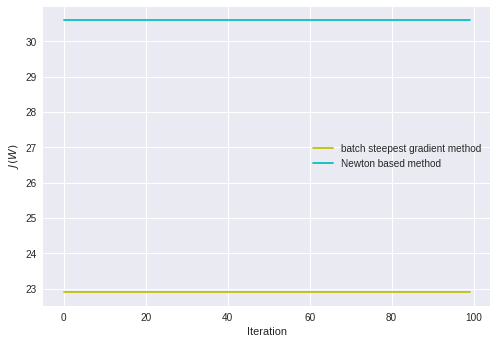

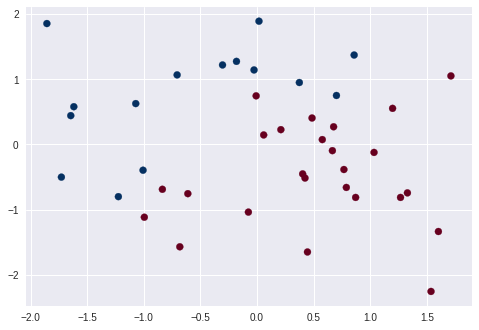

(0, 0)


In [0]:
import matplotlib.pyplot as plt

np.random.seed(1234321) # If value of seed is same,, result is always same. 

def J(W, X, y, gamma):
	return np.log(1 + np.exp(-y * W.T.dot(X))).sum() + gamma * W.T.dot(W)

gamma = 5
eta = 1 / (2 * 10 * gamma)

X, y = dataset2()

BSG = BatchSteepestGradientModel(eta=eta, gamma=gamma)
NBM = NewtonBasedModel(eta=eta, gamma=gamma)

W_BSG = BSG.fit(X, y)
W_NBM = NBM.fit(X, y)

W_BSG_J = np.array([J(W, X.T, y.reshape(1, -1), gamma).reshape(-1) for W in W_BSG])
W_NBM_J = np.array([J(W, X.T, y.reshape(1, -1), gamma).reshape(-1) for W in W_NBM])

plt.plot(range(100), W_BSG_J[:100], "y", label="batch steepest gradient method")
plt.plot(range(100), W_NBM_J[:100], "c", label="Newton based method")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("$J(W)$")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu")
plt.show()

print(BSG.score(X, y), NBM.score(X, y))


↑かつのしんのもと

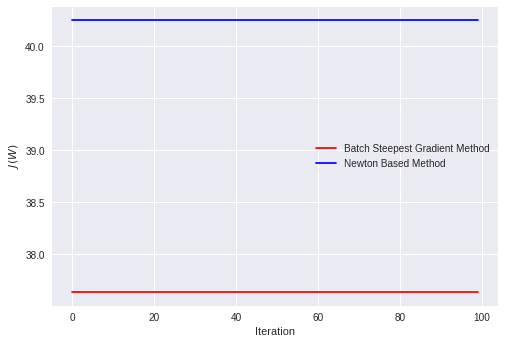

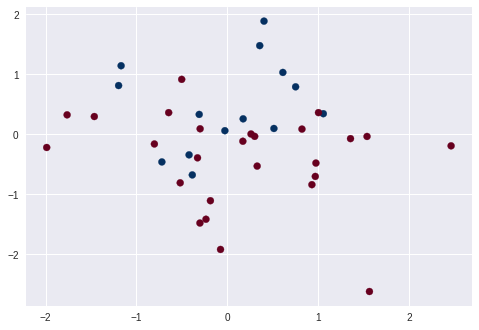

(0, 0)


In [0]:
import numpy as np

# datatest
def dataset1():
    n = 100
    x = 3 * (np.random.rand(n, 2) - 0.5)
    radius = x[:, 0] ** 2 + x[:, 1] ** 2
    y = (radius > 0.7 + 0.1 * np.random.randn(n)) == (radius < 2.2 + 0.1 * np.random.randn(n))
    y = np.array(list(map(lambda x: 1 if x else -1, y)))
    return x, y


def dataset2():
    n = 40
    omega = np.random.randn(1)
    noise = 0.8 * np.random.randn(n)
    x = np.random.randn(n, 2)
    y = omega * x[:, 0] + x[:, 1] + noise > 0
    y = np.array( list(map( lambda x: 1 if x else -1, y )) )
    return x, y


def dataset3():
    m = 20
    n = 40
    r = 2
    A = np.dot(np.random.rand(m, r), np.random.rand(r, n))
    ninc = 100
    Q = np.random.permutation(m * n)[:ninc]
    A[Q // n, Q % n] = None
    return A


# BatchSteepestGradientのコード
class BatchSteepestGradientModel(object):
    def __init__(self, eta = 0.5, gamma = 1.0):
        self.W = 0
        self.eta = eta
        self.gamma = gamma

    def fit(self, X, Y, epochs=100):
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
        else:
            X = X.T

        if len(Y.shape) == 1:
            Y = Y.reshape(1, -1)
        else:
            Y = Y.T

        self.W = np.random.randn(
            X.shape[0], Y.shape[0])

        Ws = np.array([self.W])

        for epoch in range(epochs):
            self.W -= ( self.eta * ( ((-Y * X * np.exp( -Y * np.dot(self.W.T, X) ))
                                     / (1 + np.exp(-Y * np.dot(self.W.T, X)))).sum() + 2 * self.gamma * self.W ) )
            Ws = np.append(Ws, [self.W], axis = 0)

        return Ws

    def predict(self, X):
        if len(X.shape) == 1:
            X.reshape(-1, 1)
        else:
            X = X.T

        Y_pred = np.dot(self.W.T, X)
        Y_pred = Y_pred > 0
        Y_pred = np.array(list( map( lambda x: 1 if x else -1, Y_pred.reshape(-1) ) ))

        return Y_pred

    def score(self, X, Y):
        Y_pred = self.predict(X)
        return (Y == Y_pred).sum() / len(Y)

      
# NewtonBasedのコード
class NewtonBasedModel(object):
    def __init__(self, eta = 0.5, gamma = 1):
        self.W = 0
        self.eta = eta
        self.gamma = gamma

    def fit(self, X, Y, epochs = 100):
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
        else:
            X = X.T

        if len(Y.shape) == 1:
            Y = Y.reshape(1, -1)
        else:
            Y = Y.T

        self.W = np.random.randn(X.shape[0], Y.shape[0])

        Ws = np.array([self.W])

        for epoch in range(epochs):
            hessian = (( (Y ** 2 * np.array([np.outer(xi, xi) for xi in X.T]).T * np.exp( -Y * self.W.T.dot(X) ))
                         / ( 1 + np.exp(-Y * self.W.T.dot(X)) ) ** 2).sum() + 2 * self.gamma * np.eye(X.shape[0]))
            grad = ( ( (-Y * X * np.exp(-Y * self.W.T.dot(X))) / (1 + np.exp(-Y * self.W.T.dot(X))) ).sum()
                    + 2 * self.gamma * self.W)
            self.W -= self.eta * np.linalg.inv(hessian).dot(grad)
            Ws = np.append(Ws, [self.W], axis = 0)

        return Ws

    def predict(self, X):
        if len(X.shape) == 1:
            X.reshape(-1, 1)
        else:
            X = X.T

        Y_pred = np.dot(self.W.T, X)
        Y_pred = Y_pred > 0
        Y_pred = np.array( list(map( lambda x: 1 if x else -1, Y_pred.reshape(-1) )) )

        return Y_pred

    def score(self, X, Y):
        Y_pred = self.predict(X)
        return (Y == Y_pred).sum() / len(Y)

  
    
 # 比較コード
import matplotlib.pyplot as plt

np.random.seed(42)

def J(W, X, y, gamma):
	return np.log(1 + np.exp(-y * W.T.dot(X))).sum() + gamma * W.T.dot(W)

gamma = 5
eta = 1 / (2 * 10 * gamma)

X, y = dataset2()

bsg = BatchSteepestGradientModel(eta = eta, gamma = gamma)
nb = NewtonBasedModel(eta = eta, gamma = gamma)

W_BSG = bsg.fit(X, y)
W_NB = nb.fit(X, y)

W_BSG_J = np.array([J(W, X.T, y.reshape(1, -1), gamma).reshape(-1) for W in W_BSG])
W_NB_J = np.array([J(W, X.T, y.reshape(1, -1), gamma).reshape(-1) for W in W_NB])

plt.plot(range(100), W_BSG_J[:100], "r", label = "Batch Steepest Gradient Method")
plt.plot(range(100), W_NB_J[:100], "b", label = "Newton Based Method")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("$J(W)$")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu")
plt.show()

print(bsg.score(X, y), nb.score(X, y))


比較実行コード